In [1]:
import tensorflow as tf
import numpy as np

In [2]:
#File ckpt della rete
CHECKPOINT_PATH = '/var/ifs/data/model-zoo/inceptionv4/tensorflow-1.2/inception_v4.ckpt'

In [3]:
#from inception import inception
'''
Uso di slim e nets_factory (come per SLIM Tensorflow https://github.com/tensorflow/models/blob/master/slim/train_image_classifier.py)
per il ripristino della rete. 

Le reti devono essere censite in nets_factory (v. struttura file nella directory di questo notebook)
'''

slim = tf.contrib.slim
from nets import nets_factory

In [4]:
'''
get_network_fn for returning the corresponding network function.

Se num_classes è da cambiare, impostare is_training a True

Ritorna la funzione definita nel corrispetivo file della rete
'''
model_name = 'inception_v4'
inception_net_fn = nets_factory.get_network_fn(model_name,
                                               num_classes=1001,
                                               is_training = False
                                              )

In [6]:
#sampl_input = np.random.rand(1, 300, 300, 3).astype(np.float32)
#Definizione del placeholde rdi input
sampl_input = tf.placeholder(tf.float32, [None, 300,300, 3])
#Invocazione della model fn per la definizione delle variabili della rete
inception_net_fn(sampl_input)

INFO:tensorflow:Scale of 0 disables regularizer.


(<tf.Tensor 'InceptionV4/Logits/Logits/BiasAdd:0' shape=(?, 1001) dtype=float32>,
 {'AuxLogits': <tf.Tensor 'InceptionV4/AuxLogits/Aux_logits/BiasAdd:0' shape=(?, 1001) dtype=float32>,
  'Conv2d_1a_3x3': <tf.Tensor 'InceptionV4/InceptionV4/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
  'Conv2d_2a_3x3': <tf.Tensor 'InceptionV4/InceptionV4/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
  'Conv2d_2b_3x3': <tf.Tensor 'InceptionV4/InceptionV4/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
  'Logits': <tf.Tensor 'InceptionV4/Logits/Logits/BiasAdd:0' shape=(?, 1001) dtype=float32>,
  'Mixed_3a': <tf.Tensor 'InceptionV4/InceptionV4/Mixed_3a/concat:0' shape=(?, 73, 73, 160) dtype=float32>,
  'Mixed_4a': <tf.Tensor 'InceptionV4/InceptionV4/Mixed_4a/concat:0' shape=(?, 71, 71, 192) dtype=float32>,
  'Mixed_5a': <tf.Tensor 'InceptionV4/InceptionV4/Mixed_5a/concat:0' shape=(?, 35, 35, 384) dtype=float32>,
  'Mixed_5b': <tf.Tensor 'InceptionV4/Inception

In [7]:
#tf.train.latest_checkpoint(CHECKPOINT_PATH)
slim.get_model_variables()

[<tf.Variable 'InceptionV4/Conv2d_1a_3x3/weights:0' shape=(3, 3, 3, 32) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Conv2d_1a_3x3/BatchNorm/beta:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Conv2d_1a_3x3/BatchNorm/moving_mean:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Conv2d_1a_3x3/BatchNorm/moving_variance:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Conv2d_2a_3x3/weights:0' shape=(3, 3, 32, 32) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Conv2d_2a_3x3/BatchNorm/beta:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Conv2d_2a_3x3/BatchNorm/moving_mean:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Conv2d_2a_3x3/BatchNorm/moving_variance:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Conv2d_2b_3x3/weights:0' shape=(3, 3, 32, 64) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Conv2d_2b_3x3/BatchNorm/beta:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'InceptionV4/Conv2d_2b_3x3/BatchNor

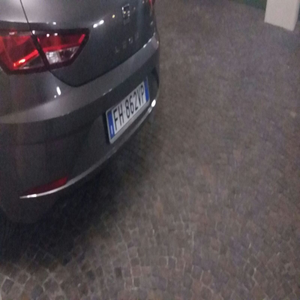

In [36]:
#Read image
IMAGE_PATH = '/home/lgrazioli/042_hardtest.jpeg'
from PIL import Image

im = Image.open(IMAGE_PATH)
im = im.resize((300,300), PIL.Image.ANTIALIAS)


im_array = np.array((np.array(im) / 255.0).astype(np.float32))
im_array = np.expand_dims(im_array, axis=0)
im

In [37]:
im_array.shape

(1, 300, 300, 3)

In [38]:
#Uso del tf Saver per il ripristino del checkpoint
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, CHECKPOINT_PATH)
    #Usare la run sulllo strato desiderato 
    print(sess.run(tf.get_default_graph().get_tensor_by_name("InceptionV4/AuxLogits/Aux_logits/weights:0"),
         feed_dict={sampl_input: im_array}))

INFO:tensorflow:Restoring parameters from /var/ifs/data/model-zoo/inceptionv4/tensorflow-1.2/inception_v4.ckpt
[[-0.00093218  0.0029746   0.02155129 ..., -0.02024786  0.02681225
  -0.07777627]
 [-0.00088061  0.03280108 -0.04109241 ..., -0.04084916 -0.02791384
  -0.04050321]
 [ 0.00897366  0.0360998   0.03171304 ...,  0.0369503  -0.00241167
  -0.06987011]
 ..., 
 [-0.00050335  0.03948867  0.06355654 ...,  0.00908378 -0.02957148
   0.07017107]
 [ 0.00073774 -0.11186306 -0.06863395 ..., -0.05956455 -0.04272214
   0.10697127]
 [ 0.00224696 -0.01446564 -0.03677175 ...,  0.07243627 -0.00266479
  -0.02469491]]
